In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras.optimizers import Adam, SGD, RMSprop
from scipy.stats import skew, kurtosis
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
# Load Data
oos_data = pd.read_pickle('Datasave/out_of_sample_data.pkl')
display(oos_data)
selected_data_ = pd.read_pickle('Datasave/Y1_selected_GBR.pkl')
display(selected_data_)

,time,sym,exch,Q1,Q2,X1,X10,X100,X101,X102,...,X93,X94,X95,X96,X97,X98,X99,Y1,Y2,date
6255000,35101000,SPX,cme,1.00,1.00,0.110048,1.154642,0.365922,0.601932,0.947039,...,0.821599,1.065129,0.496888,1.081180,1.184031,1.894004,-0.033514,26.484221,36.885033,2023-03-01
6255001,35102000,SPX,cme,1.00,1.00,0.635382,1.038147,-0.546625,-0.461508,-0.038699,...,0.080655,0.516037,-0.428270,0.006949,0.197313,1.155460,-0.569105,27.118216,37.202534,2023-03-01
6255002,35103000,SPX,cme,1.00,1.00,0.656325,1.020106,-0.396958,-0.226557,0.489506,...,0.234125,0.766339,-0.287771,0.236513,0.736676,1.316679,-0.311233,27.116507,37.510780,2023-03-01
6255003,35104000,SPX,cme,1.00,1.00,0.890574,1.349551,-0.013313,-0.087953,0.975536,...,0.722743,1.136700,0.095527,0.372919,1.245028,1.830079,0.058205,25.221476,34.698414,2023-03-01
6255004,35105000,SPX,cme,1.00,1.00,1.211060,1.219180,0.275898,0.101342,0.828281,...,0.819620,1.648215,0.391036,0.564365,1.116703,1.955107,0.557328,25.221476,34.490280,2023-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6704995,57596000,SPX,cme,0.21,0.12,0.352234,-1.181868,NaN,-0.386150,NaN,...,-0.679011,-0.860991,NaN,-1.146690,NaN,-2.003212,-0.325154,-1.812196,-1.315505,2023-03-31
6704996,57597000,SPX,cme,0.21,0.12,-0.110250,-2.079077,NaN,-0.540931,NaN,...,-1.800561,-1.490326,NaN,-1.313608,NaN,-3.187031,-0.933250,1.812853,1.315851,2023-03-31
6704997,57598000,SPX,cme,0.21,0.12,-0.248181,-2.231923,NaN,-0.984099,NaN,...,-2.271632,-2.093620,NaN,-1.779093,NaN,-3.736771,-1.502236,4.835736,3.854543,2023-03-31
6704998,57599000,SPX,cme,0.15,0.12,0.620908,NaN,NaN,-2.006201,NaN,...,NaN,-2.292643,NaN,-2.846991,NaN,NaN,-1.663266,5.440532,4.230755,2023-03-31


,Y1,X10,X106,X100,X1,X102,X104
datetime,,,,,,,
2022-01-03 09:45:01,-4.967191e+01,-0.440099,0.223038,0.044736,-1.985130,-0.453612,-0.267032
2022-01-03 09:45:02,-4.889528e+01,-0.380986,-0.737723,-0.854499,-0.933646,-0.622912,-0.177605
2022-01-03 09:45:03,-4.706744e+01,-0.180915,-0.777266,-0.854372,-0.579249,-0.320432,0.135138
2022-01-03 09:45:04,-4.759041e+01,-0.028344,-0.314707,-0.044026,-0.658292,-0.057465,0.516732
2022-01-03 09:45:05,-4.811086e+01,-0.100419,0.404281,0.273158,-1.331419,0.373589,0.562226
...,...,...,...,...,...,...,...
2023-02-28 15:59:56,-8.803647e+00,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28 15:59:57,-8.175329e+00,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28 15:59:58,-5.661267e+00,-1.136721,-0.615870,NaN,-1.213168,-1.743618,-1.879111


In [3]:
# Utility Functions
def prepare_data(data, features, target, n_steps=1):
    """
    Prepares data for LSTM model training.

    Parameters:
    data (DataFrame): The dataset containing features and target.
    features (list): List of feature column names.
    target (str): The target column name.
    n_steps (int): Number of steps for sequence prediction.

    Returns:
    tuple: Tuple containing the feature and target datasets.
    """
    # Select relevant columns and drop missing values
    selected_columns = features + [target]
    data = data[selected_columns].dropna()

    # Scale data between 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Prepare sequence data
    X, y = [], []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i, 0:len(features)])
        y.append(scaled_data[i, -1])
    return np.array(X), np.array(y)

def create_lstm_model(input_shape, lstm_units=50, optimizer='adam', learning_rate=0.001):
    """
    Creates an LSTM model with specified parameters.

    Parameters:
    input_shape (tuple): Shape of the input data.
    lstm_units (int): Number of units in LSTM layers.
    optimizer (str): Type of optimizer to use.
    learning_rate (float): Learning rate for the optimizer.

    Returns:
    Sequential: A compiled Keras Sequential model.
    """
    model = Sequential()
    model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=lstm_units))
    model.add(Dense(1))

    # Choose the optimizer
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    
    model.compile(optimizer=opt, loss='mean_squared_error')
    return model

# Prepare Training and Test Data
selected_data = selected_data_.last('1M')
features_y1 = [col for col in selected_data.columns if col.startswith('X')]
n_steps = 3
X_y1, y_y1 = prepare_data(selected_data, features_y1, 'Y1', n_steps)
X_train_y1, X_test_y1, y_train_y1, y_test_y1 = train_test_split(X_y1, y_y1, test_size=0.2, random_state=42)


Epoch 47: early stopping


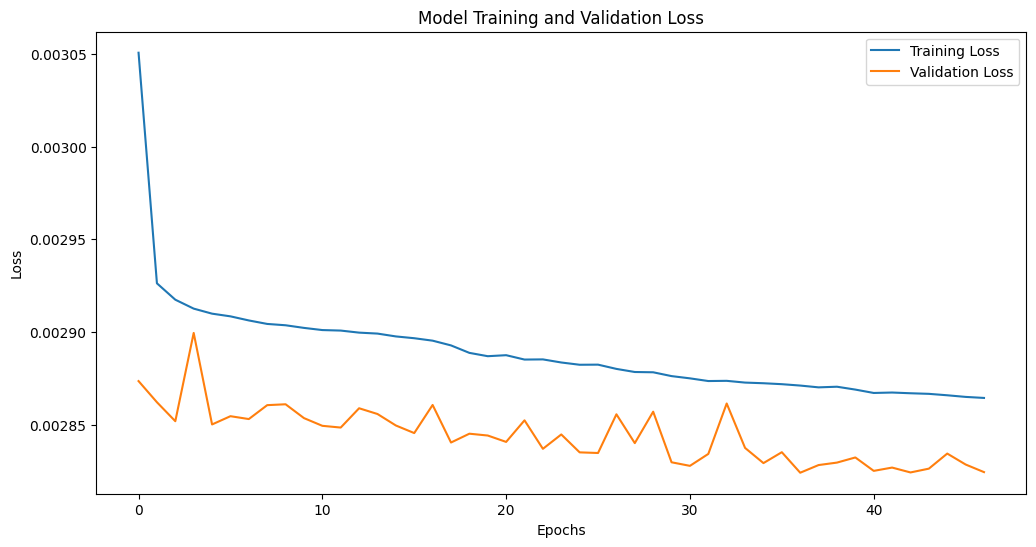

InvalidArgumentError: Graph execution error:

Detected at node Adam/truediv_3 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/sina_c/Library/Python/3.11/lib/python/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/sina_c/Library/Python/3.11/lib/python/site-packages/traitlets/config/application.py", line 1043, in launch_instance

  File "/Users/sina_c/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelapp.py", line 725, in start

  File "/Users/sina_c/Library/Python/3.11/lib/python/site-packages/tornado/platform/asyncio.py", line 215, in start

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/sina_c/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue

  File "/Users/sina_c/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 502, in process_one

  File "/Users/sina_c/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell

  File "/Users/sina_c/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 729, in execute_request

  File "/Users/sina_c/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/Users/sina_c/Library/Python/3.11/lib/python/site-packages/ipykernel/zmqshell.py", line 540, in run_cell

  File "/Users/sina_c/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell

  File "/Users/sina_c/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell

  File "/Users/sina_c/Library/Python/3.11/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/sina_c/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async

  File "/Users/sina_c/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes

  File "/Users/sina_c/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code

  File "/var/folders/hb/68t8y7qx44nctgyg2t41p3vh0000gn/T/ipykernel_52476/806543394.py", line 58, in <module>

  File "/var/folders/hb/68t8y7qx44nctgyg2t41p3vh0000gn/T/ipykernel_52476/806543394.py", line 24, in run_experiment

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1342, in apply_grad_to_update_var

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 241, in _update_step

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/optimizers/adam.py", line 204, in update_step

Incompatible shapes: [0] vs. [100,400]
	 [[{{node Adam/truediv_3}}]] [Op:__inference_train_function_1883389]

In [4]:
def run_experiment(params, X_train, y_train, X_test, y_test):
    """
    Runs a training experiment with given hyperparameters.

    Parameters:
    params (dict): Dictionary of hyperparameters for the model.
    X_train, y_train: Training data and labels.
    X_test, y_test: Testing data and labels.

    Returns:
    tuple: Trained model and its training history.
    """
    model = create_lstm_model(
        input_shape=X_train.shape[1:],
        lstm_units=params['lstm_units'],
        optimizer=params['optimizer'],
        learning_rate=params['learning_rate']
    )
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001, verbose=1),
        TensorBoard(log_dir='./logs', histogram_freq=1)
    ]
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=params['batch_size'],
        validation_data=(X_test, y_test),
        callbacks=callbacks,
        verbose=0  # Change to 1 for detailed output
    )
    return model, history

def plot_training_validation_loss(history):
    """
    Plots training and validation loss.

    Parameters:
    history (History): History object from Keras model training.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
# Run Experiments
hyperparameter_grid = [
    {'lstm_units': 50, 'optimizer': 'adam', 'learning_rate': 0.001, 'batch_size': 32},
    {'lstm_units': 100, 'optimizer': 'adam', 'learning_rate': 0.001, 'batch_size': 64},
    # Add more configurations as needed
]
experiment_results = []
for params in hyperparameter_grid:
    model, history = run_experiment(params, X_train_y1, y_train_y1, X_test_y1, y_test_y1)
    experiment_results.append({
        'params': params,
        'history': history,
        'model': model
    })

    # Plot training and validation loss for each experiment
    plot_training_validation_loss(history)

In [ ]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluates the model on test data and plots predictions.

    Parameters:
    model (Sequential): Trained Keras Sequential model.
    X_test, y_test: Testing data and labels.
    """
    val_predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, val_predictions)
    print(f'Mean Squared Error on Test Data: {mse}')

    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual')
    plt.plot(val_predictions, label='Predicted')
    plt.title('LSTM Predictions vs Actual Values')
    plt.ylabel('Value')
    plt.xlabel('Sample Index')
    plt.legend()
    plt.show()
    
# Compare Results
for result in experiment_results:
    val_loss = min(result['history'].history['val_loss'])
    print(f"Parameters: {result['params']}, Validation Loss: {val_loss}")
# Evaluate and Plot Results for the best performing model
# Assuming the best model is the last one in the experiment_results (update as needed)
best_model = experiment_results[-1]['model']
evaluate_model(best_model, X_test_y1, y_test_y1)

In [ ]:
def calculate_residuals_stats(residuals):
    """
    Calculates and prints skewness and kurtosis of residuals.

    Parameters:
    residuals (numpy.ndarray): Residuals array.
    """
    residuals_skewness = skew(residuals)
    residuals_kurtosis = kurtosis(residuals)
    print(f"Skewness of residuals: {residuals_skewness}")
    print(f"Kurtosis of residuals: {residuals_kurtosis}")
    
def plot_acf_residuals(residuals, lags=40):
    """
    Plots the Autocorrelation Function (ACF) of residuals.

    Parameters:
    residuals (numpy.ndarray): Residuals array.
    lags (int): Number of lags to include in the plot.
    """
    plot_acf(residuals, lags=lags)
    plt.show()
    
# Prepare and Evaluate OOS Data
X_oos, true_y1_oos = prepare_data(oos_data, features_y1, "Y1", n_steps)
oos_predictions = best_model.predict(X_oos)

# Calculate residuals and their statistics
residuals = true_y1_oos - oos_predictions.flatten()
calculate_residuals_stats(residuals)

# Plot ACF of Residuals
plot_acf_residuals(residuals)

In [39]:
oos_data = pd.read_pickle('Datasave/out_of_sample_data.pkl')
display(oos_data)
selected_data_ = pd.read_pickle('Datasave/Y1_selected_GBR.pkl')
display(selected_data_)

,time,sym,exch,Q1,Q2,X1,X10,X100,X101,X102,...,X93,X94,X95,X96,X97,X98,X99,Y1,Y2,date
6255000,35101000,SPX,cme,1.00,1.00,0.110048,1.154642,0.365922,0.601932,0.947039,...,0.821599,1.065129,0.496888,1.081180,1.184031,1.894004,-0.033514,26.484221,36.885033,2023-03-01
6255001,35102000,SPX,cme,1.00,1.00,0.635382,1.038147,-0.546625,-0.461508,-0.038699,...,0.080655,0.516037,-0.428270,0.006949,0.197313,1.155460,-0.569105,27.118216,37.202534,2023-03-01
6255002,35103000,SPX,cme,1.00,1.00,0.656325,1.020106,-0.396958,-0.226557,0.489506,...,0.234125,0.766339,-0.287771,0.236513,0.736676,1.316679,-0.311233,27.116507,37.510780,2023-03-01
6255003,35104000,SPX,cme,1.00,1.00,0.890574,1.349551,-0.013313,-0.087953,0.975536,...,0.722743,1.136700,0.095527,0.372919,1.245028,1.830079,0.058205,25.221476,34.698414,2023-03-01
6255004,35105000,SPX,cme,1.00,1.00,1.211060,1.219180,0.275898,0.101342,0.828281,...,0.819620,1.648215,0.391036,0.564365,1.116703,1.955107,0.557328,25.221476,34.490280,2023-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6704995,57596000,SPX,cme,0.21,0.12,0.352234,-1.181868,NaN,-0.386150,NaN,...,-0.679011,-0.860991,NaN,-1.146690,NaN,-2.003212,-0.325154,-1.812196,-1.315505,2023-03-31
6704996,57597000,SPX,cme,0.21,0.12,-0.110250,-2.079077,NaN,-0.540931,NaN,...,-1.800561,-1.490326,NaN,-1.313608,NaN,-3.187031,-0.933250,1.812853,1.315851,2023-03-31
6704997,57598000,SPX,cme,0.21,0.12,-0.248181,-2.231923,NaN,-0.984099,NaN,...,-2.271632,-2.093620,NaN,-1.779093,NaN,-3.736771,-1.502236,4.835736,3.854543,2023-03-31
6704998,57599000,SPX,cme,0.15,0.12,0.620908,NaN,NaN,-2.006201,NaN,...,NaN,-2.292643,NaN,-2.846991,NaN,NaN,-1.663266,5.440532,4.230755,2023-03-31


,Y1,X10,X106,X100,X1,X102,X104
datetime,,,,,,,
2022-01-03 09:45:01,-4.967191e+01,-0.440099,0.223038,0.044736,-1.985130,-0.453612,-0.267032
2022-01-03 09:45:02,-4.889528e+01,-0.380986,-0.737723,-0.854499,-0.933646,-0.622912,-0.177605
2022-01-03 09:45:03,-4.706744e+01,-0.180915,-0.777266,-0.854372,-0.579249,-0.320432,0.135138
2022-01-03 09:45:04,-4.759041e+01,-0.028344,-0.314707,-0.044026,-0.658292,-0.057465,0.516732
2022-01-03 09:45:05,-4.811086e+01,-0.100419,0.404281,0.273158,-1.331419,0.373589,0.562226
...,...,...,...,...,...,...,...
2023-02-28 15:59:56,-8.803647e+00,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28 15:59:57,-8.175329e+00,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28 15:59:58,-5.661267e+00,-1.136721,-0.615870,NaN,-1.213168,-1.743618,-1.879111


In [40]:
# Define Utility Functions
def prepare_data(data, features, target, n_steps=1):
    selected_columns = features + [target]
    data = data[selected_columns].dropna()

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i - n_steps:i, 0:len(features)])  # Select only feature columns
        y.append(scaled_data[i, -1])  # Append target value
    return np.array(X), np.array(y)

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [41]:
from keras.optimizers import Adam, SGD, RMSprop

# Define a function to create the LSTM model with variable hyperparameters
def create_lstm_model(input_shape, lstm_units=50, optimizer='adam', learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=lstm_units))
    model.add(Dense(1))

    # Choose the optimizer
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    
    model.compile(optimizer=opt, loss='mean_squared_error')
    return model

# Define a function to run an experiment
def run_experiment(params):
    model = create_lstm_model(
        input_shape=X_train_y1.shape[1:],
        lstm_units=params['lstm_units'],
        optimizer=params['optimizer'],
        learning_rate=params['learning_rate']
    )
    history = model.fit(
        X_train_y1, y_train_y1,
        epochs=100,
        batch_size=params['batch_size'],
        validation_data=(X_test_y1, y_test_y1),
        callbacks=[early_stopping, reduce_lr, tensorboard_callback],
        verbose=0  # Set to 1 if you wish to see the training output
    )
    return model, history

# List of hyperparameters to try
hyperparameter_grid = [
    {'lstm_units': 50, 'optimizer': 'adam', 'learning_rate': 0.001, 'batch_size': 32},
    {'lstm_units': 100, 'optimizer': 'adam', 'learning_rate': 0.001, 'batch_size': 64},
    # Add more configurations as needed
]

# Run experiments
experiment_results = []
for params in hyperparameter_grid:
    model, history = run_experiment(params)
    experiment_results.append({
        'params': params,
        'history': history,
        'model': model
    })

# After running experiments, compare the validation loss of each configuration
for result in experiment_results:
    val_loss = min(result['history'].history['val_loss'])
    print(f"Parameters: {result['params']}, Validation Loss: {val_loss}")


In [ ]:
# Prepare Training and Test Data
selected_data = selected_data_.last('1M')
features_y1 = [col for col in selected_data.columns if col.startswith('X')]
n_steps = 3
X_y1, y_y1 = prepare_data(selected_data, features_y1, 'Y1', n_steps)

# Splitting datasets into train and test sets
X_train_y1, X_test_y1, y_train_y1, y_test_y1 = train_test_split(X_y1, y_y1, test_size=0.2, random_state=42)

# Build and Train the LSTM Model
model_y1 = create_lstm_model(X_train_y1.shape[1:])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001, verbose=1)
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

history = model_y1.fit(X_train_y1, y_train_y1, epochs=100, batch_size=32, 
                       validation_data=(X_test_y1, y_test_y1), 
                       callbacks=[early_stopping, reduce_lr, tensorboard_callback])


Epoch 1/100
10335/10335 [==============================] - 18s 2ms/step - loss: 0.0031 - val_loss: 0.0031 - lr: 0.0010
Epoch 2/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0029 - val_loss: 0.0029 - lr: 0.0010
Epoch 3/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0029 - val_loss: 0.0029 - lr: 0.0010
Epoch 4/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0029 - val_loss: 0.0029 - lr: 0.0010
Epoch 5/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0029 - val_loss: 0.0029 - lr: 0.0010
Epoch 6/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0029 - val_loss: 0.0029 - lr: 0.0010
Epoch 7/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0029 - val_loss: 0.0029 - lr: 0.0010
Epoch 8/100
10335/10335 [==============================] - 16s 2ms/step - loss: 0.0029 - val_loss: 0.0029 - lr: 0.0010
Epoch 9/100
10335/10335 [=======================

In [ ]:
# View the architecture of the model
model_y1.summary()

# Access weights of the first LSTM layer (as an example)
weights_first_lstm_layer = model_y1.layers[0].get_weights()

# Print weights
print(weights_first_lstm_layer)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 50)             11400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31651 (123.64 KB)
Trainable params: 31651 (123.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
[array([[-1.6300507 , -0.05225546, -0.9618229 , ..., -0.46173924,
        -0.18591532, -0.7382463 ],
       [ 0.06208256, -0.2996209 , -0.58826894, ..., -0.7891034 ,
        -0.19064437, -0.8113806 ],
       [ 0.34692872, -1.0459138 , -0.0651391 , ..., -0.7418995 ,
        -0.57002

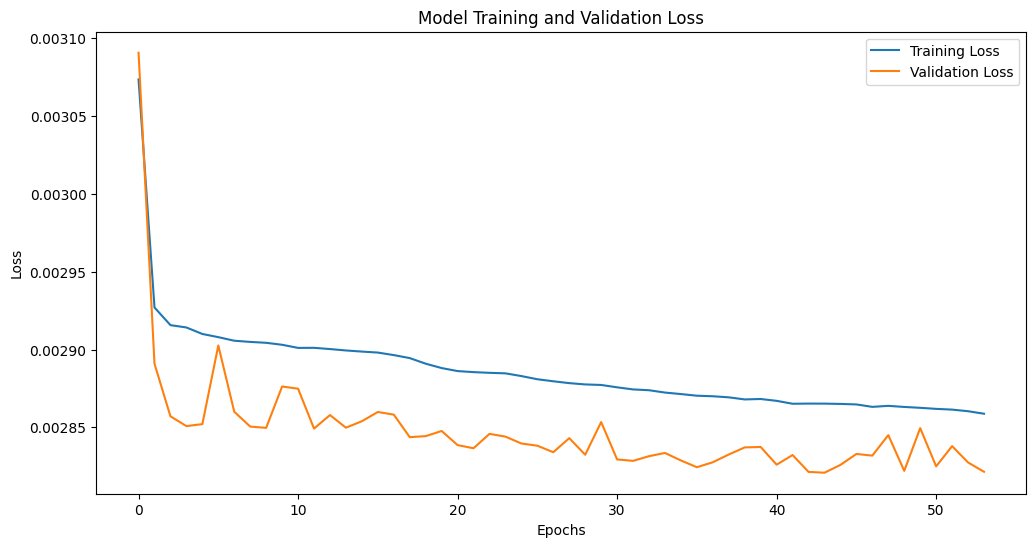

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


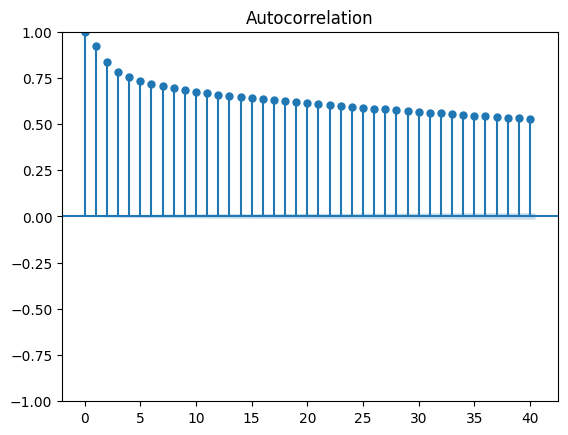

2584/2584 [==============================] - 2s 518us/step
Mean Squared Error on Test Data: 0.0028214449994266033


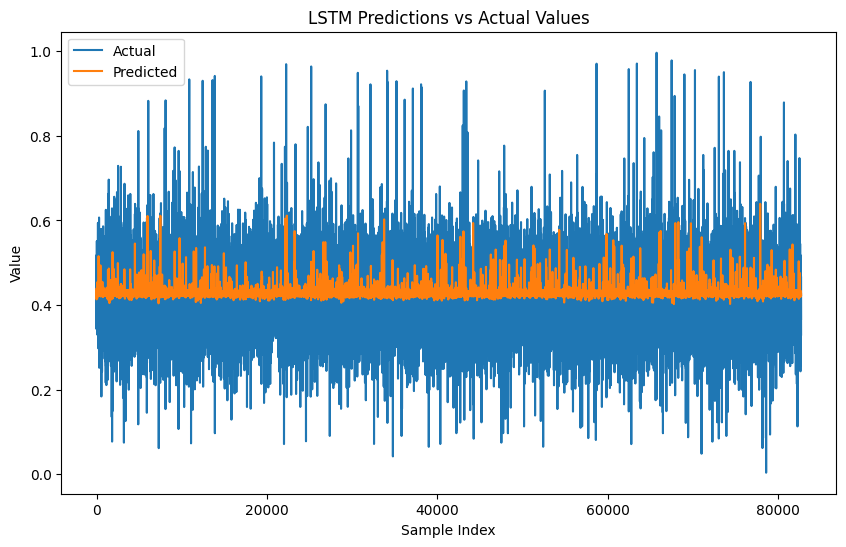

In [ ]:
# Evaluate Model on Test Data
val_predictions = model_y1.predict(X_test_y1)
mse = mean_squared_error(y_test_y1, val_predictions)
print(f'Mean Squared Error on Test Data: {mse}')

# Plot Predictions vs Actual Values
plt.figure(figsize=(10, 6))
plt.plot(y_test_y1, label='Actual')
plt.plot(val_predictions, label='Predicted')
plt.title('LSTM Predictions vs Actual Values')
plt.ylabel('Value')
plt.xlabel('Sample Index')
plt.legend()
plt.show()

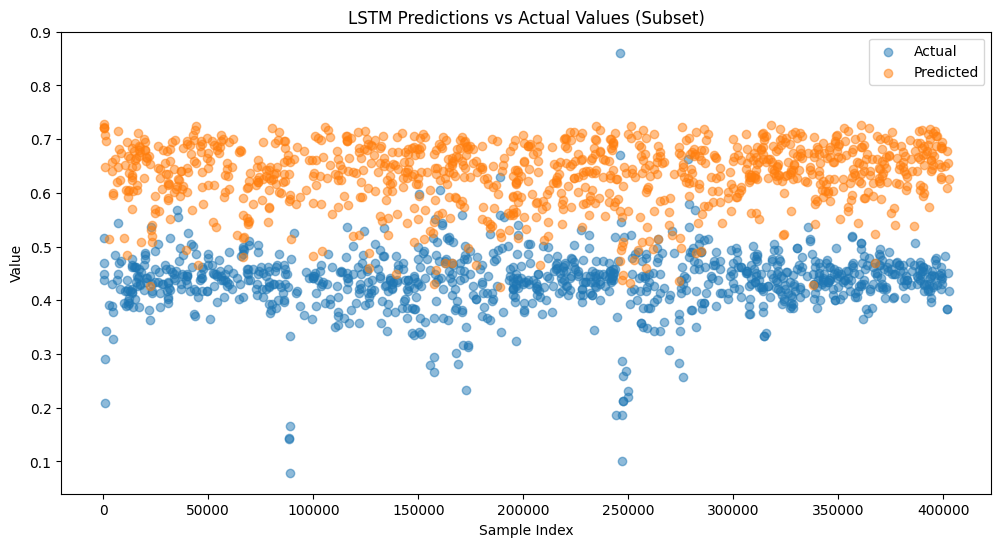

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'true_y1_oos' are the actual values and 'oos_predictions' are the model predictions
# Select a subset of data to plot
subset_size = 1000  # Adjust this to your preferred subset size
indices = np.random.choice(range(len(true_y1_oos)), subset_size, replace=False)

plt.figure(figsize=(12, 6))
plt.scatter(indices, true_y1_oos[indices], label='Actual', alpha=0.5)
plt.scatter(indices, oos_predictions[indices], label='Predicted', alpha=0.5)
plt.title('LSTM Predictions vs Actual Values (Subset)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()


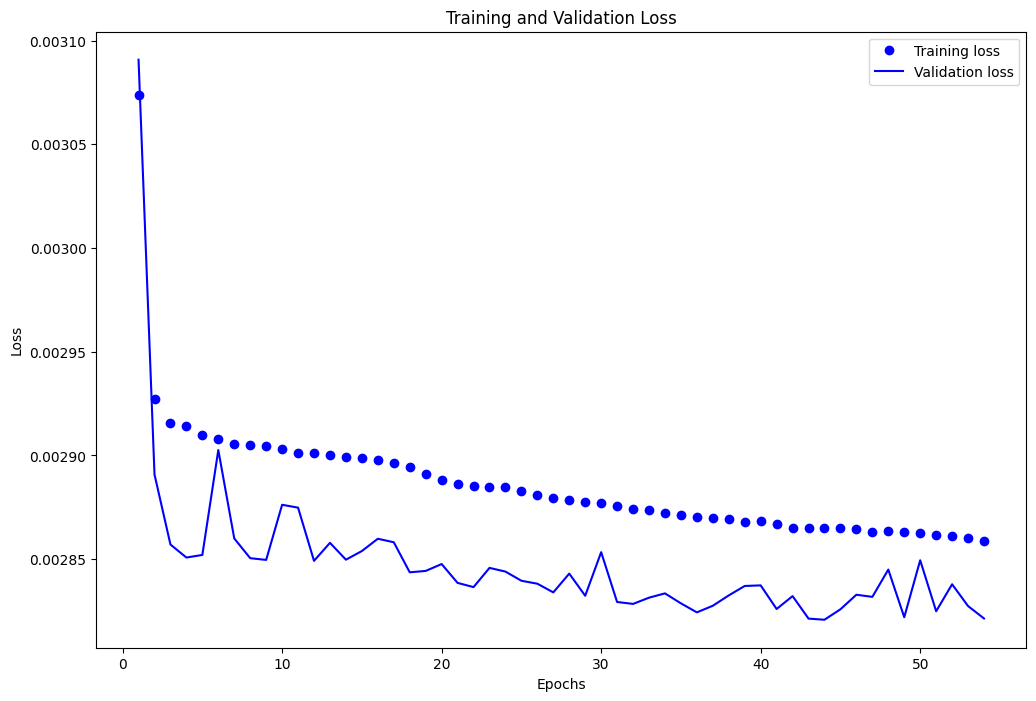

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output of the fit method of your model
history_dict = history.history

# Extract the loss and validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epochs, loss_values, 'bo', label='Training loss')  # 'bo' for blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  # 'b' for solid blue line
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


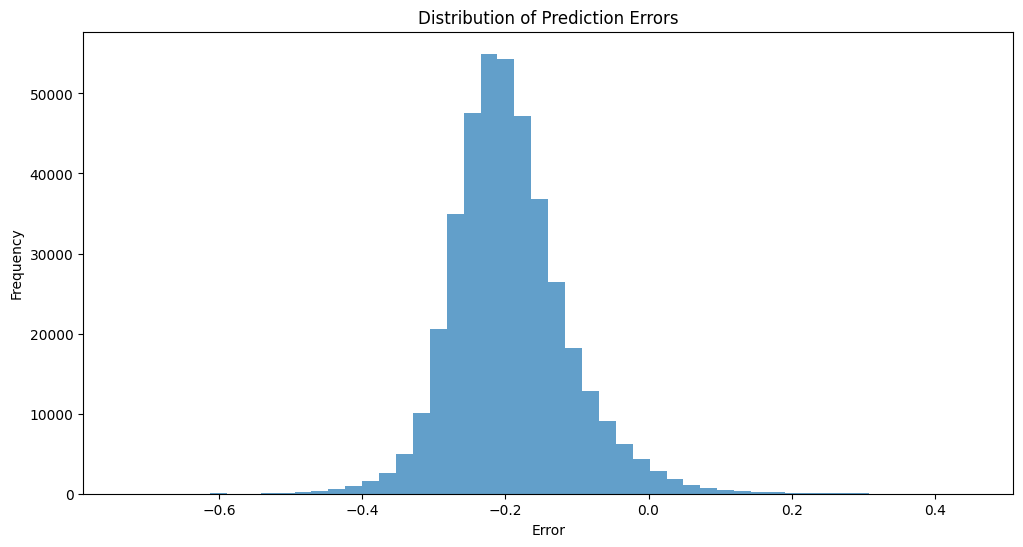

12590/12590 [==============================] - 7s 520us/step
Mean Squared Error on OOS Data: 0.044241707772016525


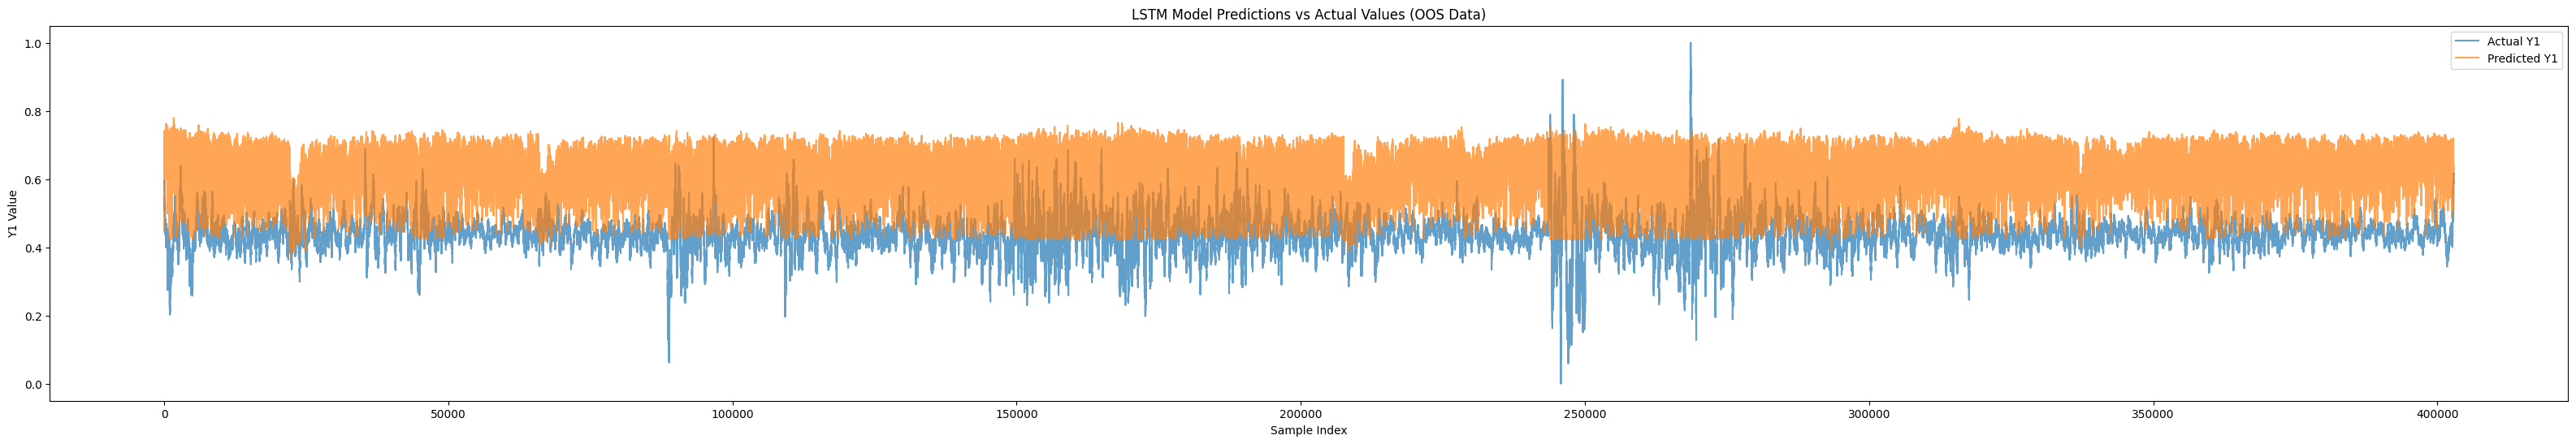

In [ ]:
# Prepare and Evaluate OOS Data
X_oos, true_y1_oos = prepare_data(oos_data, features_y1, "Y1", n_steps)

# Predict using the model
oos_predictions = model_y1.predict(X_oos)

# Assuming you have the true 'Y1' values for OOS data in a variable named 'y_true_oos'

mse_oos = mean_squared_error(true_y1_oos, oos_predictions)
print(f'Mean Squared Error on OOS Data: {mse_oos}')
# Plot Predictions vs Actual Values for OOS Data
plt.figure(figsize=(40, 6))
plt.plot(true_y1_oos, label='Actual Y1', alpha=0.7)
plt.plot(oos_predictions, label='Predicted Y1', alpha=0.7)
plt.title('LSTM Model Predictions vs Actual Values (OOS Data)')
plt.xlabel('Sample Index')
plt.ylabel('Y1 Value')
plt.legend()
plt.show()



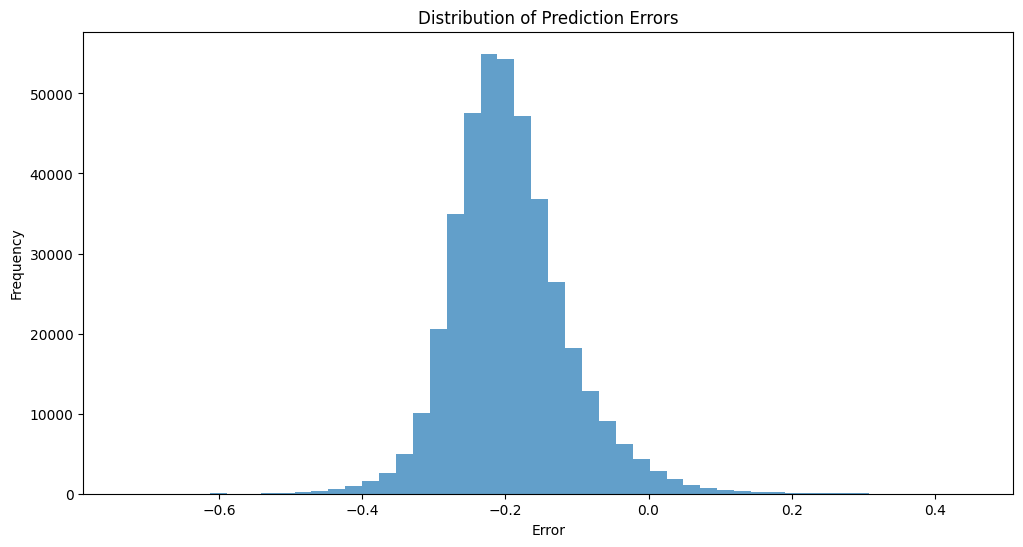

In [ ]:
residuals = true_y1_oos - oos_predictions.flatten()
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

from scipy.stats import skew, kurtosis

# Assuming 'oos_predictions' are your model's predictions and 'true_y1_oos' are the actual values
residuals = true_y1_oos - oos_predictions.flatten()

# Calculate skewness and kurtosis
residuals_skewness = skew(residuals)
residuals_kurtosis = kurtosis(residuals)

print(f"Skewness of residuals: {residuals_skewness}")
print(f"Kurtosis of residuals: {residuals_kurtosis}")



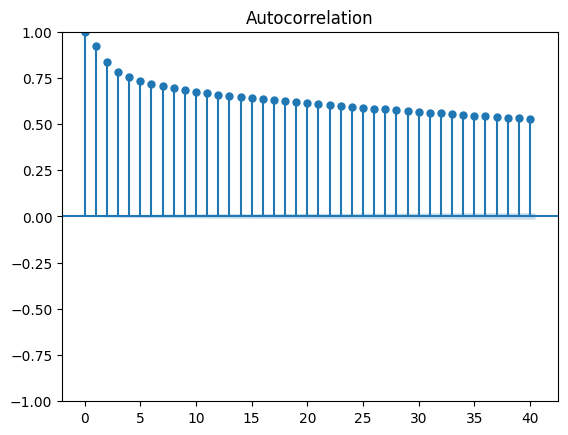

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals, lags=40)
plt.show()


Skewness of residuals: 0.6315059069321642
Kurtosis of residuals: 2.222999719155138
